## 전압 측정 예제(초간단 칼만 필터)
전압의 평균 = 14.4V
잡음 = 평균 0, 표준편차 2
전압 측정은 0.2초 마다 실시하고, 10초간 측정한다.

In [12]:
# 데이터 생성 함수
import numpy as np

def make_data(t):
    data = []
    z = 14.4
    step = int(t/0.2)
    w = np.random.normal(0, 4, step)
    for i in range(step):
        data.append(z+w[i])
    return data

In [13]:
voltage_meas = make_data(10)

In [21]:
# 초기값, 시스템 행렬, 출력 행렬, 공분산 행렬 정의
x = 14
P = 6
A = 1   # 전압이 일정하므로 직전 값 그대로
H = 1   # 출력행렬
Q = 0   # 시스템 오차가 없으므로 0
R = 4   # 측정오차에 대한 공분산은 주어진 잡음 값 이용

# 칼만 필터 함수
def kalman_filter(idx, x, P):
    if idx >= len(voltage_meas):
        return

    z = voltage_meas[idx]
    x_p = A*x
    P_p = A*P*(A**-1) + Q
    K = P_p*(H**-1) / (H*P_p*(H**-1) + R)
    x = x_p + K*(z - H*x_p)
    P = P_p - K*H*P_p

    esti_volt.append(x)
    esti_P.append(P)
    KGain.append(K)

    kalman_filter(idx + 1, x, P)


In [25]:
esti_volt = []
esti_P = []
KGain = []
kalman_filter(0, x, P)
times = [i*0.2 for i in range(50)]
    

Text(0, 0.5, 'Voltage[V]')

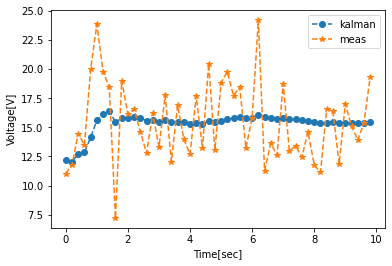

In [33]:
from matplotlib import pyplot as plt

plt.plot(times, esti_volt, 'o--', label='kalman')
plt.plot(times, voltage_meas, '*--', label='meas')
plt.legend()
plt.xlabel('Time[sec]')
plt.ylabel('Voltage[V]')

Text(0, 0.5, 'P')

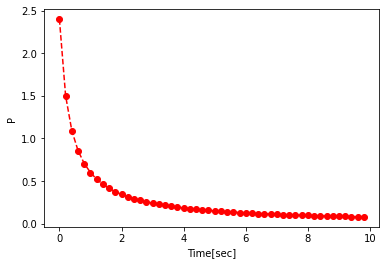

In [39]:
plt.plot(times, esti_P, 'or--')
plt.xlabel('Time[sec]')
plt.ylabel('P')


Text(0, 0.5, 'K')

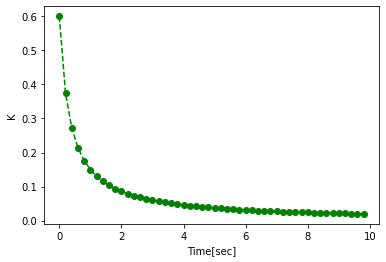

In [41]:
plt.plot(times, KGain, 'og--')
plt.xlabel('Time[sec]')
plt.ylabel('K')